## Gradient Boosting 

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score


In [239]:
training = pd.read_csv('../test/training-person2.csv').fillna(0)
test = pd.read_csv('../test/test-person2.csv').fillna(0)
sumbit = test['person'].to_frame()

In [240]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.2

In [241]:
for feature in training.columns:
    if feature == 'label':
        continue
    training[feature] = training[feature].fillna(training[feature].mean())
    test[feature] = test[feature].fillna(test[feature].mean())

In [242]:
y = training['label']
X = training.drop(axis=1, labels=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

feature_list = list(X.columns)

In [243]:
rdf = GradientBoostingClassifier(learning_rate=0.05, 
                                 n_estimators=177,
                                 max_depth=3,
                                 max_features=5,
                                 min_samples_split=750, 
                                 min_samples_leaf=70, 
                                 subsample=0.8, 
                                 random_state=RANDOM_SEED
                                )

# n_estimators = 177
# max_depth = 3

In [244]:
# Training
rdf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=70, min_samples_split=750,
              min_weight_fraction_leaf=0.0, n_estimators=177,
              presort='auto', random_state=12, subsample=0.8, verbose=0,
              warm_start=False)

In [245]:
# Predict value
ret = rdf.predict_proba(X_test)

In [246]:
y_test_predictd = rdf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_test_predictd)

0.8591647822899565

In [247]:
rdf.score(X_test, y_test)

0.9459181045583311

In [248]:
# Predict value kaggle set
# Training
rdf.fit(X, y)
ret = rdf.predict_proba(test.drop(axis=1, labels=['person']))

In [249]:
# Get proba
sumbit['label'] = pd.DataFrame(ret)[1]

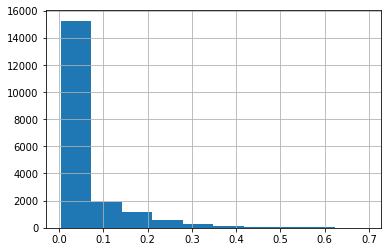

In [250]:
g = (sumbit['label']).hist()

In [251]:
# Get numerical feature importances
importances = list(rdf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: checkout days        Importance: 0.1679144
Variable: checkout             Importance: 0.1143727
Variable: conversion days      Importance: 0.062711
Variable: visited site days    Importance: 0.0429775
Variable: viewed product days  Importance: 0.0374802
Variable: color_model_categ    Importance: 0.0335147
Variable: device_type_categ    Importance: 0.0327525
Variable: conversion           Importance: 0.0320597
Variable: viewed product       Importance: 0.0294763
Variable: ad campaign hit days Importance: 0.0265296
Variable: events_mean_frec_last_week Importance: 0.0259739
Variable: event                Importance: 0.0241233
Variable: events_cout_last_week Importance: 0.0239615
Variable: generic listing days Importance: 0.0237654
Variable: last_event_days      Importance: 0.0234615
Variable: region_categ         Importance: 0.0226231
Variable: brand listing        Importance: 0.022364
Variable: search engine hit days Importance: 0.0220167
Variable: top_searched_model_categ Impo

In [252]:
sumbit.to_csv('test/Gradient-Boosting.csv', index=False)

In [253]:
import gc
gc.collect()

2919